<a href="https://colab.research.google.com/github/ghafooretemad/Deep-Learning-With-Keras/blob/master/GenderBasedFingerprintClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt 
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model


# New Section

In [ ]:
train_path = "FingerData/Train"
valid_path = "FingerData/Valid"
test_path = "FingerData/Test"

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes=["Male", "Female"], batch_size = 300)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes=["Male", "Female"], batch_size = 10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes=["Male", "Female"], batch_size = 100)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


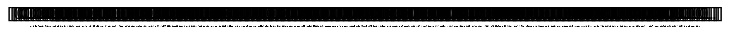

In [ ]:
plots(imgs, titles=labels)

In [ ]:
model  = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    dropout(),
    Conv2D(13, (6,6), activation="relu", input_shape=(224,224,3)),
    dropout(),
    Conv2D(20, (6,6), activation="relu", input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation="softmax")
])

NameError: ignored

In [ ]:
model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=50, validation_data=valid_batches, validation_steps=30, epochs=10, verbose=2)

Epoch 1/10
 - 6186s - loss: 0.0182 - accuracy: 0.9968 - val_loss: 19.0520 - val_accuracy: 0.4881
Epoch 2/10
 - 6251s - loss: 1.6510e-08 - accuracy: 1.0000 - val_loss: 14.1069 - val_accuracy: 0.5035
Epoch 3/10


In [ ]:
test_imgs, test_lables = next(test_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


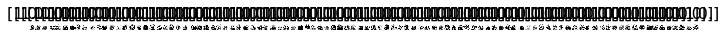

In [ ]:
plots(test_imgs, titles=test_lables)

In [ ]:
predicted = model.predict_generator(test_batches, steps=1, verbose=2)
prediction = np.argmax(predicted, axis=1)

In [ ]:
prediction

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])